In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','no-latex','grid'])
V=np.loadtxt('realdata.dat',unpack=True)
V1=np.loadtxt('data100.dat',unpack=True)

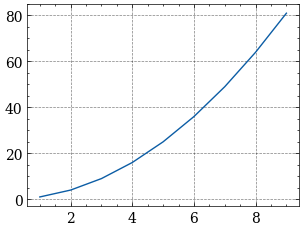

In [21]:
X=[1,2,3,4,5,6,7,8,9]
Y=[]
for i in X:
    Y.append(i**2)
plt.plot(X,Y)
plt.show()

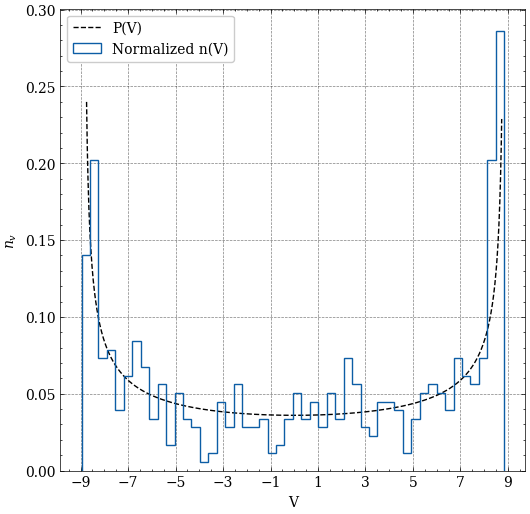

In [50]:
V0=max(V)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V,bins=50,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN.png',dpi=200)
plt.show()


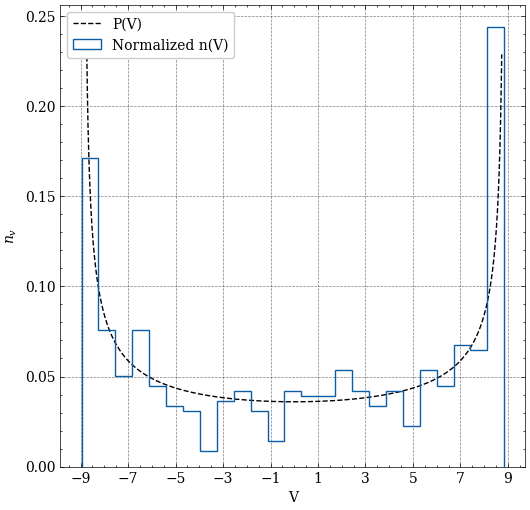

In [49]:
V0=max(V)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V,bins=25,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(bin=25).png',dpi=200)
plt.show()


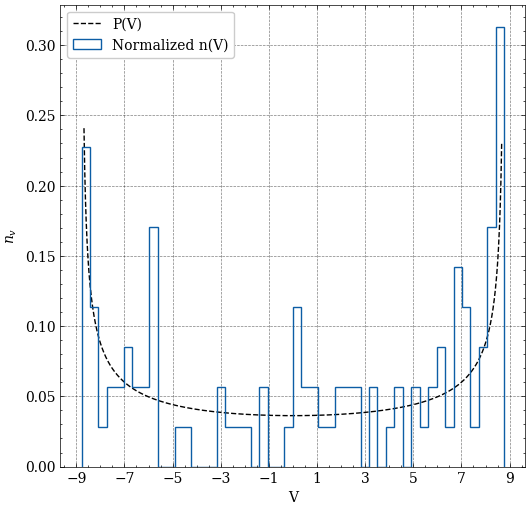

In [51]:
V0=max(V1)  #max voltage


plt.figure(figsize=(6,6))
x = np.arange(-V0+0.1, V0-0.1, 0.01)
plt.plot(x,(1/(np.pi*np.sqrt(V0**2-x**2))),color='black',linestyle='--',label='P(V)')
plt.hist(V1,bins=50,label='Normalized n(V)',density=True,histtype='step',linestyle='-')
plt.xticks(np.arange(-9,10,2))
plt.xlabel('V')
plt.ylabel('$n_v$')
plt.legend(loc='upper left')
plt.savefig('VvsN(100 obs).png',dpi=200)
plt.show()


In [31]:
ru=[]
for i in V:
    if i not in ru:
        ru.append(i)
print(len(ru))

406


[2.2368869715000947, 3.7881840810788194, 4.611033251060175, 5.205282881014099, 5.9699906651828405, 6.5124927646461295, 7.0377581271662955, 7.167458621296874, 7.585247602953094, 7.746516968098889, 7.79783802058292, 7.990730422614261, 8.142968446278326, 8.383710702875524, 8.476050788956144, 8.568549169822202, 8.591940339977644, 8.696251317616596, 8.755055144288189, 8.779306768109505, 8.773761569784373, 8.723907306365673, 8.580414124928739, 8.446602956525833, 8.350276213071448, 8.101066656059608, 7.896778108752739, 7.772330913498957, 7.5290840413802655, 7.103169210612038, 6.765106271571429, 6.0902760250364265, 5.468076712685628, 4.889367912766292, 2.713169210612039, 1.075239889651376e-15]


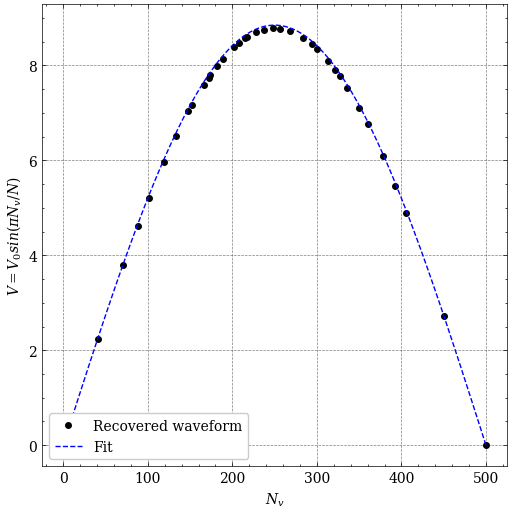

In [59]:
V=np.loadtxt('realdata.dat',unpack=True)
V=list(V) # for 500 observations

frac=[i/10 for i in range(-85,95,5)]
Nv=[]
for i in range(-85,95,5):
    c=0
    for j in ru:
        if -9<=j and j<=i/10:
            c+=V.count(j)
    Nv.append(c)

plt.figure(figsize=(6,6))
Vs=[]
for i in Nv:
    Vs.append(V0*np.sin(np.pi*i/500))
print(Vs)
plt.plot(Nv,Vs,'ko',markersize=4,label='Recovered waveform')

x2 = np.linspace(0, 500, 100)
y2 = max(V)*np.sin(np.pi*x2/500)


plt.plot(x2,y2,'b--',label='Fit')
plt.ylabel('$V=V_0sin(\pi N_v/N)$')
plt.xlabel('$N_v$')
plt.legend(loc='lower left')
plt.savefig('VsinvsN.png',dpi=200)
plt.show()